In [2]:
import matplotlib.pyplot as plt
from MCEq.particlemanager import MCEqParticle, ParticleManager
from MCEq.data import InteractionCrossSections, HDF5Backend
from MCEq.core import MCEqRun
import crflux.models as pm
import mceq_config as config

In [3]:
mceq_run = MCEqRun(
#provide the string of the interaction model
interaction_model="QGSJETII04",
#primary cosmic ray flux model
primary_model = (pm.HillasGaisser2012, "H3a"),
# Zenith angle in degrees. 0=vertical, 90=horizontal
theta_deg=0.0
)

MCEqRun::set_interaction_model(): QGSJETII04
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a


In [49]:

for p in mceq_run.pman.all_particles:
    if p.is_hadron:
        print(f"Name = {p.name},\t\t pdg_id = {p.pdg_id[0]},\t "
        f"mix_energy =  {p.E_mix:0.2e}, mass = {p.mass:0.2e}, ctau = {p.ctau:0.2e}")
# apart = mceq_run.pman.all_particles

Name = pi0,		 pdg_id = 111,	 mix_energy =  1.41e+09, mass = 1.35e-01, ctau = 2.55e-06
Name = K_L0,		 pdg_id = 130,	 mix_energy =  2.24e+01, mass = 4.98e-01, ctau = 1.53e+03
Name = pi-,		 pdg_id = -211,	 mix_energy =  8.91e+00, mass = 1.40e-01, ctau = 7.80e+02
Name = pi+,		 pdg_id = 211,	 mix_energy =  8.91e+00, mass = 1.40e-01, ctau = 7.80e+02
Name = K_S0,		 pdg_id = 310,	 mix_energy =  8.91e+03, mass = 4.98e-01, ctau = 2.68e+00
Name = K-,		 pdg_id = -321,	 mix_energy =  8.91e+01, mass = 4.94e-01, ctau = 3.71e+02
Name = K+,		 pdg_id = 321,	 mix_energy =  8.91e+01, mass = 4.94e-01, ctau = 3.71e+02
Name = nbar0,		 pdg_id = -2112,	 mix_energy =  5.62e-01, mass = 9.40e-01, ctau = 2.66e+13
Name = n0,		 pdg_id = 2112,	 mix_energy =  5.62e-01, mass = 9.40e-01, ctau = 2.66e+13
Name = pbar-,		 pdg_id = -2212,	 mix_energy =  0.00e+00, mass = 9.38e-01, ctau = inf
Name = p+,		 pdg_id = 2212,	 mix_energy =  0.00e+00, mass = 9.38e-01, ctau = inf
Name = Lambdabar0,		 pdg_id = -3122,	 mix_energy =  5.

In [7]:
hdf5_backend = HDF5Backend()
interaction_cs = InteractionCrossSections(hdf5_backend, "DPMJETIII191")

In [13]:
# for p in mceq_run.pman.all_particles:
#     if p.is_hadron:

# en_grid = interaction_cs.energy_grid.c
# csec_prot = interaction_cs.get_cs(2212, True)

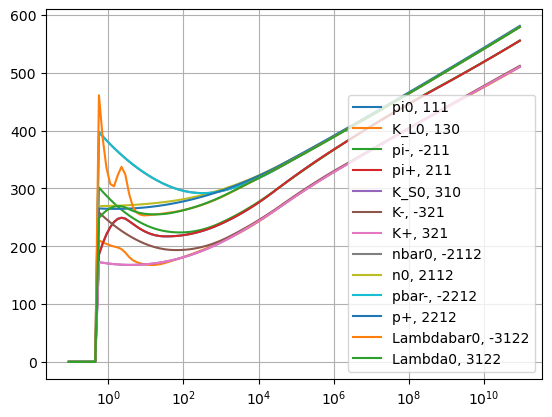

In [8]:
for p in mceq_run.pman.all_particles:
    # if p.is_hadron and abs(p.pdg_id[0]) in [111, 211]:
    # if p.is_hadron and abs(p.pdg_id[0]) in [2212, 2112, 3122]:
    # if p.is_hadron and abs(p.pdg_id[0]) in [321, 310, 130, 2212, 111]:
    if p.is_hadron:
        plt.semilogx(interaction_cs.energy_grid.c, interaction_cs.get_cs(p.pdg_id[0], True), label=f"{p.name}, {p.pdg_id[0]}")
        
plt.grid()
plt.legend()    